In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_and_preprocess_data()


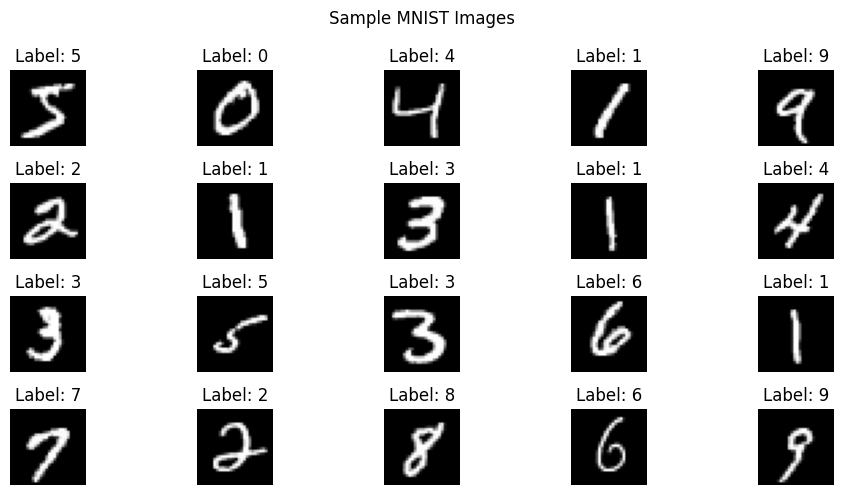

In [3]:
def plot_sample_images(x, y, count=20):
    plt.figure(figsize=(10, 5))
    for i in range(count):
        plt.subplot(4, 5, i + 1)
        plt.imshow(x[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.suptitle('Sample MNIST Images')
    plt.tight_layout()
    plt.show()

plot_sample_images(x_train, y_train)


In [4]:
def build_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Dense(784, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(384, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Dense(192, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Dense(96, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model((784,))
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 384)                 │         301,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 384)                 │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 192)                 │          73,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 192)                 │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 96)                  │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,122 (3.88 MB)

 Trainable params: 1,013,210 (3.87 MB)

 Non-trainable params: 2,912 (11.38 KB)

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/30
469/469 - 9s - 20ms/step - accuracy: 0.9080 - loss: 0.3076 - val_accuracy: 0.9606 - val_loss: 0.1263
Epoch 2/30
469/469 - 6s - 13ms/step - accuracy: 0.9579 - loss: 0.1406 - val_accuracy: 0.9722 - val_loss: 0.0935
Epoch 3/30
469/469 - 7s - 15ms/step - accuracy: 0.9673 - loss: 0.1078 - val_accuracy: 0.9762 - val_loss: 0.0806
Epoch 4/30
469/469 - 6s - 13ms/step - accuracy: 0.9708 - loss: 0.0943 - val_accuracy: 0.9746 - val_loss: 0.0772
Epoch 5/30
469/469 - 6s - 12ms/step - accuracy: 0.9747 - loss: 0.0811 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 6/30
469/469 - 7s - 14ms/step - accuracy: 0.9774 - loss: 0.0727 - val_accuracy: 0.9788 - val_loss: 0.0712
Epoch 7/30
469/469 - 7s - 15ms/step - accuracy: 0.9797 - loss: 0.0647 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 8/30
469/469 - 6s - 13ms/step - accuracy: 0.9808 - loss: 0.0614 - val_accuracy: 0.9821 - val_loss: 0.0633
Epoch 9/30
469/469 - 6s - 12ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9797 - val_loss:

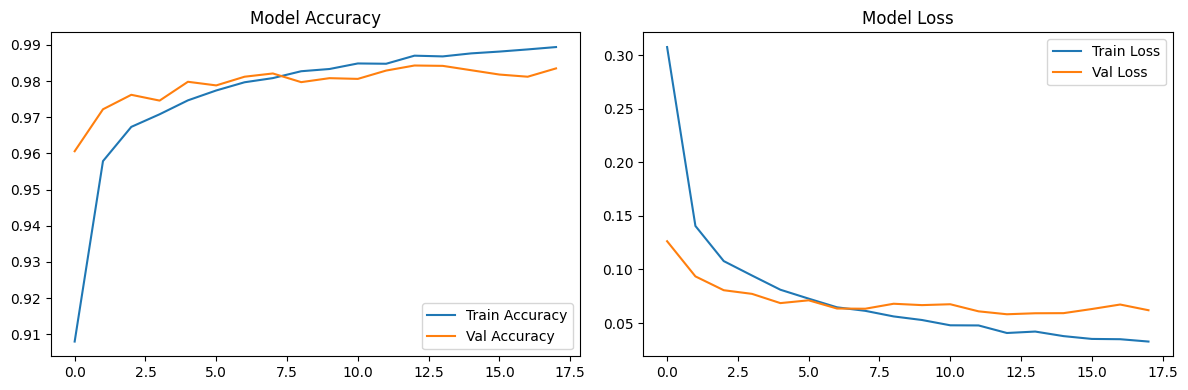

In [6]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9843


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


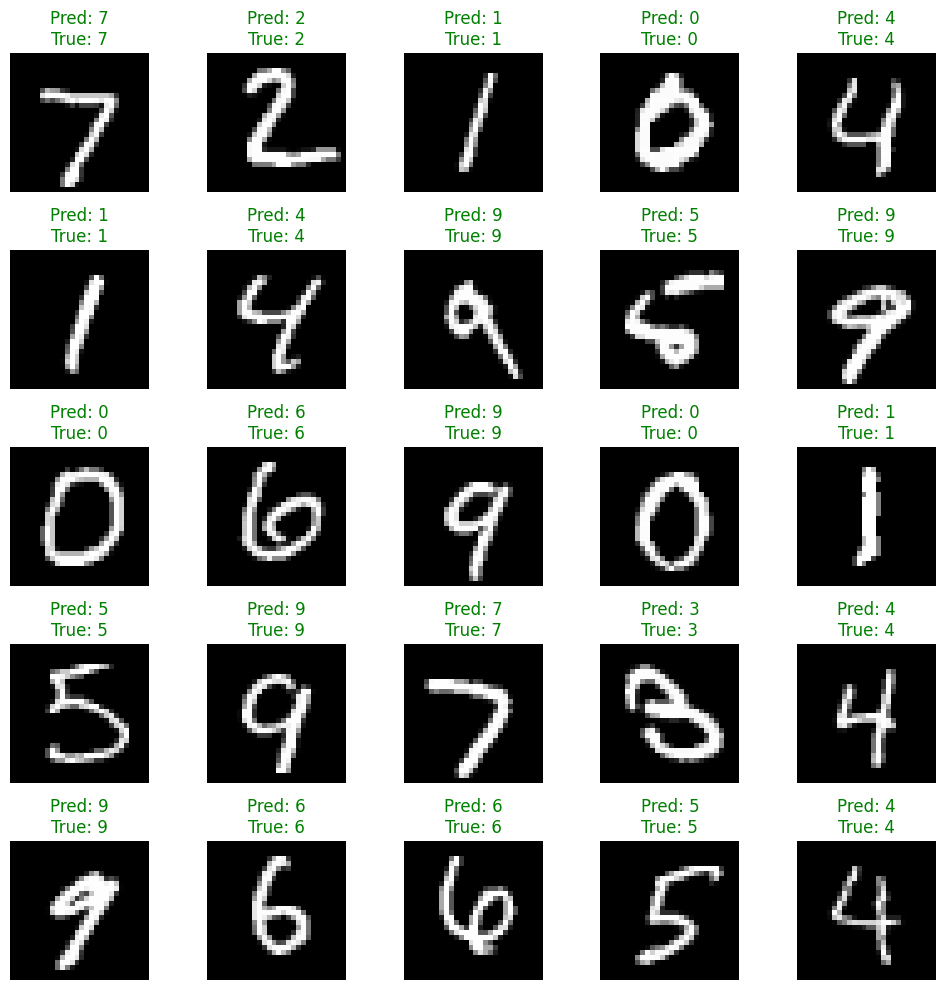

In [8]:
def visualize_predictions(model, x_test, y_test, num_samples=25):
    predictions = model.predict(x_test)
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        pred_label = np.argmax(predictions[i])
        true_label = y_test[i]
        color = 'green' if pred_label == true_label else 'red'
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(model, x_test, y_test)
